In [1]:
!unzip '/content/santander-customer-satisfaction.zip'

Archive:  /content/santander-customer-satisfaction.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [3]:
data = pd.read_csv('/content/train.csv')

In [4]:
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [5]:
data.shape

(76020, 371)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [7]:
data.columns

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=371)

In [8]:
data = data.drop(['ID'], axis=1)

In [9]:
data.isnull().sum()

var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
imp_op_var39_comer_ult3    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 370, dtype: int64

In [10]:
data.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [11]:
x = data.drop(['TARGET'], axis=1)
y = data['TARGET']

In [12]:
x.shape

(76020, 369)

In [13]:
y.shape

(76020,)

In [14]:
from imblearn.combine import SMOTETomek
smt = SMOTETomek()
x, y = smt.fit_resample(x, y)

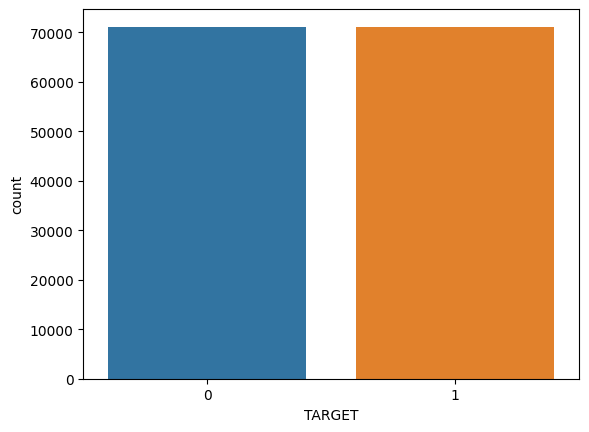

In [15]:
sns.countplot(x=y)
plt.show()

In [16]:
x.shape

(142254, 369)

In [17]:
y.shape

(142254,)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [19]:
def acc_report(actual,predicted):
    acc_score=accuracy_score(actual,predicted)
    cm_matrix=confusion_matrix(actual,predicted)
    class_rep=classification_report(actual,predicted)
    print('the accuracy of tha model is ',acc_score)
    print(cm_matrix)
    print(class_rep)

DTREE

In [20]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
predttrain = dt.predict(x_train)
predttest = dt.predict(x_test)
acc_report(y_train, predttrain)

the accuracy of tha model is  0.9864942048979377
[[56021  1031]
 [  506 56245]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     57052
           1       0.98      0.99      0.99     56751

    accuracy                           0.99    113803
   macro avg       0.99      0.99      0.99    113803
weighted avg       0.99      0.99      0.99    113803



In [21]:
acc_report(y_test, predttest)

the accuracy of tha model is  0.9352922568626761
[[12993  1082]
 [  759 13617]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     14075
           1       0.93      0.95      0.94     14376

    accuracy                           0.94     28451
   macro avg       0.94      0.94      0.94     28451
weighted avg       0.94      0.94      0.94     28451



KNN

In [22]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
pred_knn_train = knn.predict(x_train)
pred_knn_test = knn.predict(x_test)
acc_report(y_train, pred_knn_train)


the accuracy of tha model is  0.9023312214967971
[[48269  8783]
 [ 2332 54419]]
              precision    recall  f1-score   support

           0       0.95      0.85      0.90     57052
           1       0.86      0.96      0.91     56751

    accuracy                           0.90    113803
   macro avg       0.91      0.90      0.90    113803
weighted avg       0.91      0.90      0.90    113803



In [23]:
acc_report(y_test, pred_knn_test)


the accuracy of tha model is  0.8673508839759587
[[11201  2874]
 [  900 13476]]
              precision    recall  f1-score   support

           0       0.93      0.80      0.86     14075
           1       0.82      0.94      0.88     14376

    accuracy                           0.87     28451
   macro avg       0.87      0.87      0.87     28451
weighted avg       0.87      0.87      0.87     28451



RANDOM FOREST CLASSIFIER

In [24]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
pred_rf_train = rf.predict(x_train)
pred_rf_test = rf.predict(x_test)
acc_report(y_train, pred_rf_train)


the accuracy of tha model is  0.9864854177833625
[[55997  1055]
 [  483 56268]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     57052
           1       0.98      0.99      0.99     56751

    accuracy                           0.99    113803
   macro avg       0.99      0.99      0.99    113803
weighted avg       0.99      0.99      0.99    113803



In [25]:
acc_report(y_test, pred_rf_test)


the accuracy of tha model is  0.9503708129766968
[[13342   733]
 [  679 13697]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     14075
           1       0.95      0.95      0.95     14376

    accuracy                           0.95     28451
   macro avg       0.95      0.95      0.95     28451
weighted avg       0.95      0.95      0.95     28451



In [29]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
predgbtrain = gb.predict(x_train)
predgbtest = gb.predict(x_test)
acc_report(y_train, predgbtrain)

the accuracy of tha model is  0.9060042353892253
[[51673  5379]
 [ 5318 51433]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     57052
           1       0.91      0.91      0.91     56751

    accuracy                           0.91    113803
   macro avg       0.91      0.91      0.91    113803
weighted avg       0.91      0.91      0.91    113803



In [31]:
acc_report(y_test, predgbtest)


the accuracy of tha model is  0.9046782186917859
[[12698  1377]
 [ 1335 13041]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     14075
           1       0.90      0.91      0.91     14376

    accuracy                           0.90     28451
   macro avg       0.90      0.90      0.90     28451
weighted avg       0.90      0.90      0.90     28451



## TEST

In [39]:
test = pd.read_csv('/content/test.csv')

In [40]:
test = test.drop(['ID'], axis=1)

In [41]:
test.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [42]:
test['y'] = rf.predict(test)

In [43]:
test['y']

0        0
1        0
2        0
3        0
4        0
        ..
75813    0
75814    0
75815    0
75816    0
75817    0
Name: y, Length: 75818, dtype: int64